In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from IPython.display import Image

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install word2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 739.5 kB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=144110 sha256=5a85291c9d2b78b7293c3cb66f6b25d9e03d6555c9d59988a2014044940fd3cd
  Stored in directory: /root/.cache/pip/wheels/6a/fa/d1/e03e8c10e0e2aa5c7b6e2b46b4a1c715d140283853937bb4b1
Successfully built word2vec


In [4]:
!pip install node2vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.1 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


In [5]:
edge_list = pd.read_csv(r'/kaggle/input/payment/Payments.csv')

In [6]:
edge_list.head()

Sender  Receiver  Amount
0    1309      1011  123051
1    1309      1011  118406
2    1309      1011  112456
3    1309      1011  120593
4    1309      1011  166396

In [7]:
edge_list = edge_list.applymap(str)

In [8]:
G=nx.from_pandas_edgelist(edge_list, source='Sender', target='Receiver', edge_attr=True, create_using=nx.DiGraph())

In [9]:
G.nodes

NodeView(('1309', '1011', '1259', '1568', '1147', '1393', '1039', '1210', '1005', '1042', '1045', '1018', '1256', '1074', '1668', '1163', '1007', '1034', '1832', '1099', '1488', '1801', '1076', '1944', '1659', '1048', '1205', '1057', '1220', '1032', '1837', '1061', '1222', '1017', '1075', '1023', '2085', '1503', '2088', '1350', '1327', '1276', '1666', '1056', '1748', '1658', '1003', '1228', '1138', '1089', '1002', '1623', '1264', '1875', '1004', '1595', '1090', '1051', '1101', '1079', '1104', '1839', '1747', '1135', '1656', '1500', '1148', '1136', '1172', '1132', '1809', '1774', '1037', '1930', '2184', '1243', '1293', '1990', '1690', '1449', '1310', '1679', '1159', '1335', '1862', '1049', '1105', '1766', '1013', '1541', '1961', '1575', '1189', '1723', '1962', '1084', '1480', '2146', '1405', '1016', '1729', '2166', '2073', '1015', '1344', '1917', '1535', '1077', '1087', '1431', '1080', '1098', '1701', '1009', '1191', '1142', '1081', '1146', '1199', '1754', '1545', '1134', '1517', '1202'

In [10]:
G.is_directed()

True

In [11]:
# function to generate random walk sequences of nodes for a particular node
def get_random_walk(node, walk_length):
    # initialization
    random_walk_length = [node]
    
    #loop over to get the nodes visited in a random walk
    for i in range(walk_length-1):
        # list of neighbors
        neighbors = list(G.neighbors(node))
        # if the same neighbors are present in ranom_walk_length list, then donot add them as new neighbors
        neighbors = list(set(neighbors) - set(random_walk_length))    
        if len(neighbors) == 0:
            break
        # pick any one neighbor randomly from the neighbors list
        random_neighbor = random.choice(neighbors)
        # append that random_neighbor to the random_walk_length list
        random_walk_length.append(random_neighbor)
        node = random_neighbor
        
    return random_walk_length

In [12]:
get_random_walk('1838', 10)

['1838', '1517', '1236', '1238', '1428']

In [13]:
# calculate random walks for every node in the Graph
all_nodes = list(G.nodes())
number_of_random_walks = 5
random_walks = []

for node in tqdm(all_nodes):
    # number of random walks
    for i in range(number_of_random_walks):
        # append the random walk sequence of a node from a specified length
        random_walks.append(get_random_walk(node, 10))

100%|██████████| 799/799 [00:00<00:00, 6588.36it/s]


In [14]:
len(random_walks)

3995

In [15]:
random_walks[0]

['1309', '1263']

In [16]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
    )

model.build_vocab(random_walks, progress_per=2)

In [17]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(333867, 434720)

In [18]:
print(model)

Word2Vec<vocab=799, vector_size=100, alpha=0.03>


In [19]:
# most similar nodes to node '1517'
for node, _ in model.wv.most_similar('1517'):
    print((node, _))

('1838', 0.8185243010520935)
('1236', 0.8025537133216858)
('1428', 0.7897836565971375)
('1124', 0.7800382375717163)
('1238', 0.7661232352256775)
('1441', 0.7383105158805847)
('2053', 0.7366287708282471)
('1273', 0.6945012211799622)
('1649', 0.6664139628410339)
('1177', 0.6421905159950256)


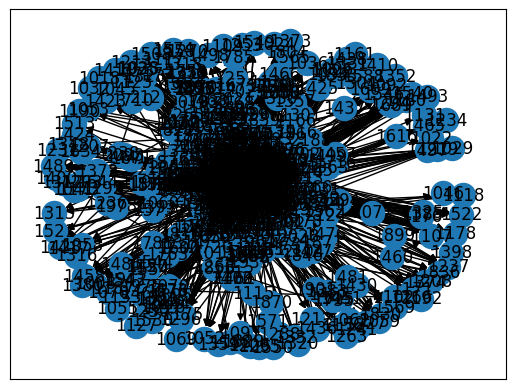

In [20]:
nx.draw_networkx(G)

In [21]:
def plot_nodes(word_list):
    X = model.wv[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

In [22]:
numbers = list(G.nodes)

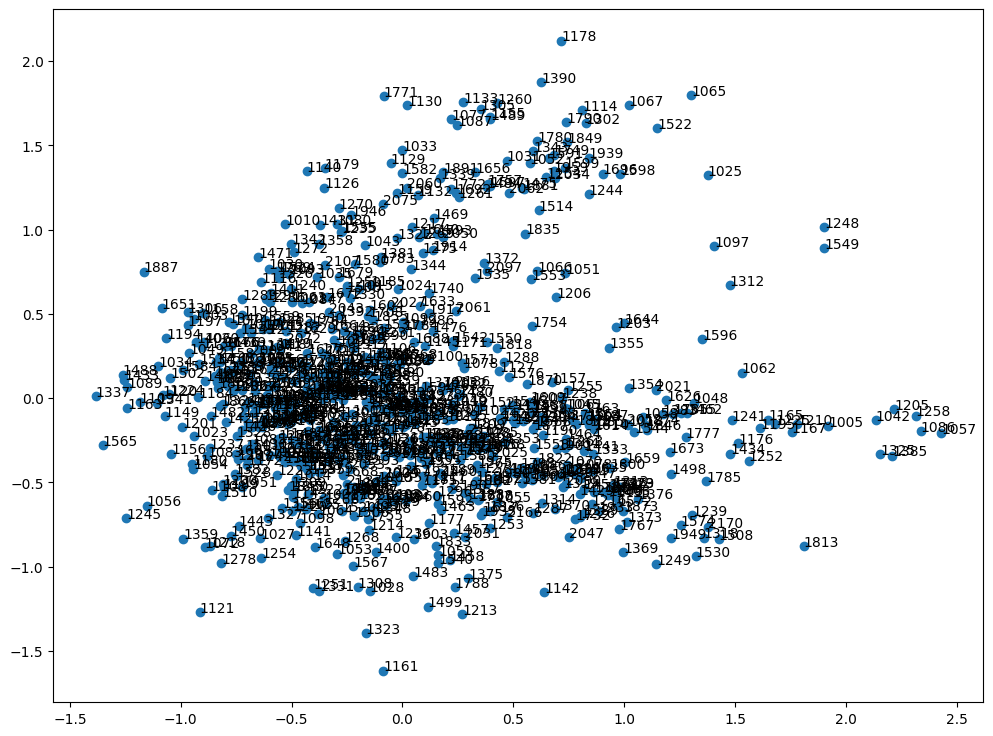

In [23]:
plot_nodes(numbers)

In [24]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec

In [25]:
node2vec = Node2Vec(G, dimensions=128, walk_length=40, num_walks=100, workers=2)

Computing transition probabilities:   0%|          | 0/799 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:04<00:00, 10.36it/s]


In [26]:
model1 = node2vec.fit(window=10, min_count=1)

In [27]:
# Get the vector of node '1'
model1.wv.get_vector('1887')


array([-1.58255726e-01, -2.42827728e-01, -1.27403036e-01,  1.44314140e-01,
       -4.95703984e-03, -2.97764763e-02,  1.47259474e-01, -2.65166350e-02,
       -5.91764636e-02,  4.58826929e-01,  2.60346323e-01,  1.21646613e-01,
       -1.73166379e-01, -3.14005792e-01,  2.38592625e-01,  1.85593903e-01,
       -1.37489915e-01,  1.52012378e-01,  5.03035225e-02,  3.77146155e-02,
       -3.20152551e-01,  7.40292966e-02, -3.52275610e-01, -1.95469886e-01,
       -1.32429227e-01,  3.43471110e-01, -2.85401821e-01,  5.52452505e-01,
        6.27544597e-02, -3.34580183e-01, -6.03377447e-02, -3.90374988e-01,
       -1.85860217e-01,  6.34307042e-02, -1.10034660e-01,  1.39511347e-01,
        6.56062812e-02,  3.41817379e-01,  4.35367934e-02, -5.21603748e-02,
        1.92789957e-02,  1.02076136e-01, -1.09627850e-01, -2.91091185e-02,
        1.22871801e-01, -1.94736034e-01, -8.64231288e-02, -4.78355847e-02,
        6.08270429e-02,  4.01269019e-01,  7.79531226e-02, -1.63118854e-01,
        3.46701890e-01,  

In [28]:
# most similar nodes to node '1'
for node, _ in model.wv.most_similar('1517'):
    print((node, _))

('1838', 0.8185243010520935)
('1236', 0.8025537133216858)
('1428', 0.7897836565971375)
('1124', 0.7800382375717163)
('1238', 0.7661232352256775)
('1441', 0.7383105158805847)
('2053', 0.7366287708282471)
('1273', 0.6945012211799622)
('1649', 0.6664139628410339)
('1177', 0.6421905159950256)


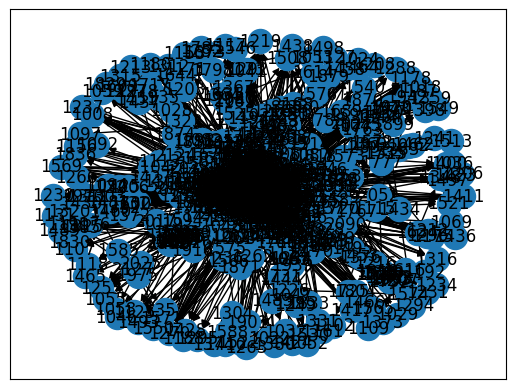

In [29]:
# verify the most similar nodes generated by node2vec from the graph
nx.draw_networkx(G)

In [30]:
# save the node embeddings
model1.wv.save_word2vec_format('embedding.csv')

In [31]:
# save the model for later use (useful when node2Vec takes lots of time/memory to generate node embeddings)
model1.save('model')

In [32]:
# Retrieve node embeddings
node_ids = model1.wv.index_to_key  # list of node IDs
node_embeddings = model1.wv.vectors

In [33]:
!pip install text-unidecode


In [34]:
import warnings
from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import seaborn as sns

sns.set_style('whitegrid')

In [35]:
node2vec = Node2Vec(G, dimensions=128, walk_length=40, num_walks=100, workers=2)

Computing transition probabilities:   0%|          | 0/799 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:04<00:00, 10.10it/s]


In [36]:
# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)

In [37]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(node_embeddings)

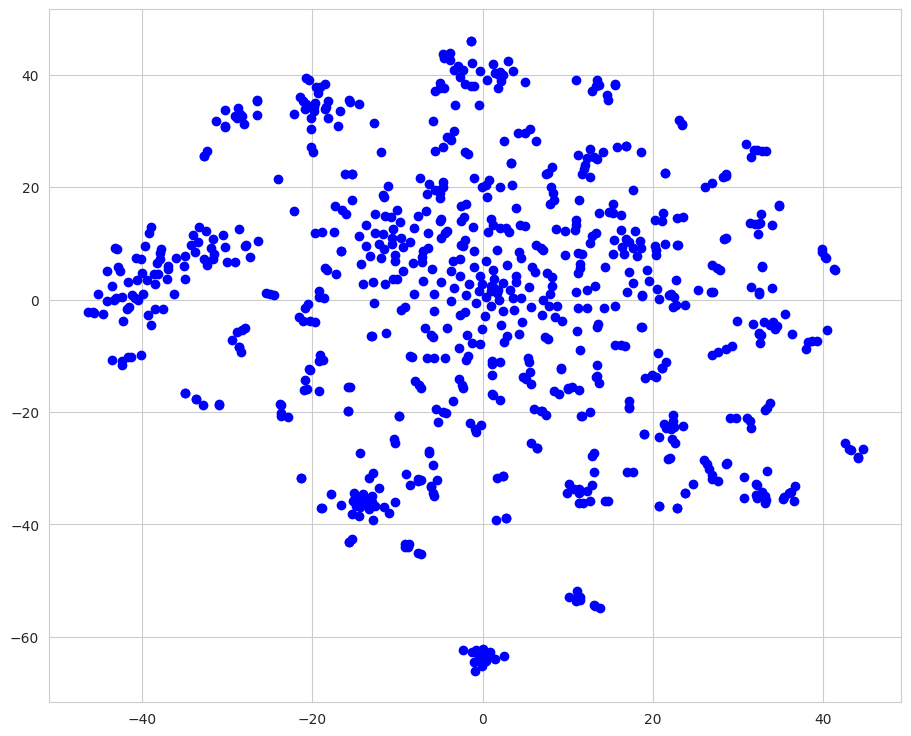

In [48]:
figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
